In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from scipy.io import loadmat
import numpy as np
import os
import h5py
from os.path import isfile, join
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import sklearn.decomposition
import cmath
import os
import imageio
import seaborn as sns
import scipy
import hypertools
from analysis.utils.image_bispectrum import *
from analysis.utils.visualization import *
from analysis.utils.structural_graph_clustering import *
from scipy.spatial import distance_matrix
import networkx as nx
%load_ext autoreload
%autoreload 2

# Load shapes data

In [5]:
shapes_dir = '/Users/Sophia/Datasets/neuro/visual_cortex/tang_shapes_2018/'

In [ ]:
# f = h5py.File(shapes_dir+'ShapeSiitimi.mat','r')
# shapes = np.array(f['ShapeStimi']).T

In [6]:
f2 = scipy.io.loadmat(shapes_dir+'Rsp8OT5S.mat')
shapes_neurons = f2['Rsp8OT5S']

In [ ]:
batch_neurons = np.mean(shapes_neurons[:100, :, :], axis=1)
batch_neurons[batch_neurons < 0] = 0
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(batch_neurons, cmap="magma")

# Load natural scenes data

In [7]:
ns_dir = '/Users/Sophia/Datasets/neuro/visual_cortex/tang_natural_images_2017/Monkey A/NS/'

In [8]:
# f = h5py.File(ns_dir+'PicStimi2.mat','r')
# ns = np.transpose(np.array(f['PicStimi2'], dtype=int), (0, 3, 2, 1))[:, 50:150, 50:150, :]

In [9]:
f2 = scipy.io.loadmat(ns_dir+'Rsp0412PicS.mat')
ns_neurons = np.array(f2['Rsp0412PicS'])

In [ ]:
batch_neurons = np.mean(ns_neurons[:100, :, :], axis=1)
batch_neurons[batch_neurons < 0] = 0
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(batch_neurons, cmap="magma")

# Generate network graphs

In [3]:
def make_network_graph(neurons):
    cov = np.cov(np.mean(neurons, axis=1))
    cov -= np.mean(cov)
    cov /= np.std(cov)
    cov[[cov < 1e-3] or [cov > -1e-3]] = 0
    np.fill_diagonal(cov, 0)
    G = nx.from_numpy_matrix(cov)
    return cov, G

In [10]:
shapes_cov, shapes_G = make_network_graph(shapes_neurons)

/Users/Sophia/Software/anaconda3/envs/gbs/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


In [11]:
ns_cov, ns_G = make_network_graph(ns_neurons)

/Users/Sophia/Software/anaconda3/envs/gbs/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


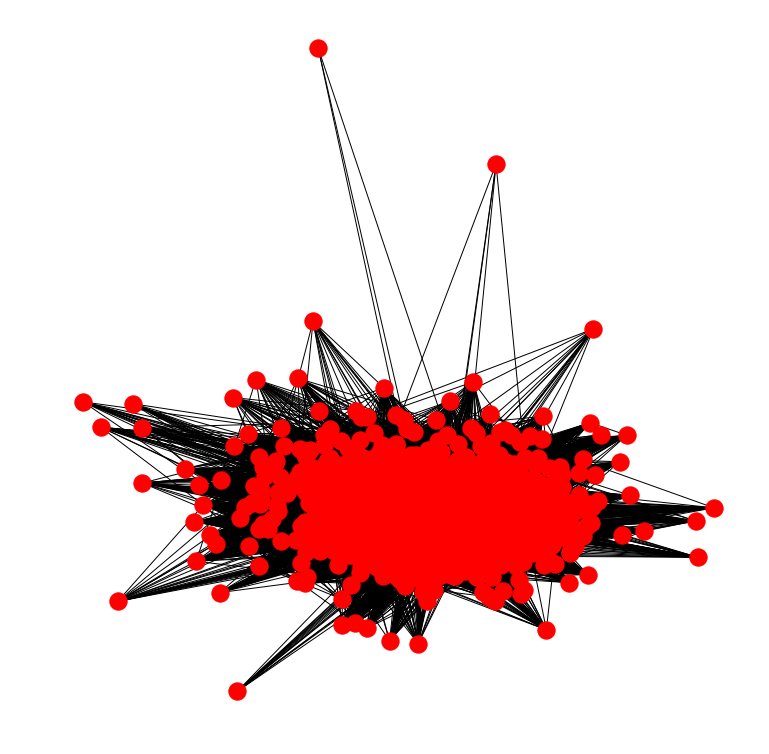

In [13]:
plt.rcParams["figure.figsize"] = (10,10)
nx.draw_spring(ns_G)

/Users/Sophia/Software/anaconda3/envs/gbs/lib/python2.7/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
/Users/Sophia/Software/anaconda3/envs/gbs/lib/python2.7/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


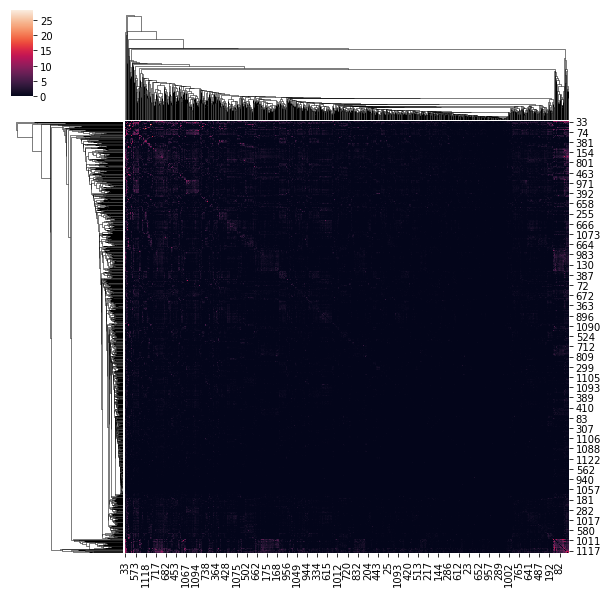

In [15]:
sns.clustermap(shapes_cov)

In [ ]:
ns_vecs, ns_pca_coords, ns_node_labels, ns_cluster_dict, ns_cluster_centers = learn_graphwave(G, k=120, n_components=3)

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
h = ht.plot(ns_vecs, '.', n_clusters=120, ndims=3, animate='spin', show=False)
HTML(h.line_ani.to_html5_video()) 

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plot_graph_clusters(ns_G, ns_cluster_dict, pos_type='cluster', pca_coords=ns_pca_coords)

In [ ]:
ns_d = distance_matrix(ns_vecs, ns_vecs)

In [18]:
np.mean(shapes_cov)

0.2482941426445528

In [ ]:
plt.hist(shapes_cov, bins=100);

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
h = ht.plot(np.mean(shapes_neurons, axis=1), '.', n_clusters=120, ndims=3, animate='spin')
HTML(h.line_ani.to_html5_video()) 